In [1]:
%pylab inline

import os
import glob
import numpy as np
import astropy.table as astTable
import matplotlib.pyplot as plt
import xlens
import fitsio
import warnings
warnings.filterwarnings('ignore')

tplist = fitsio.read("/gpfs02/work/xiangchong.li/work/hsc_data/s23b/tracts_fdfc_v1_final_sims.fits")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
colnames = [
    "flux", "fpfs_e1", "fpfs_e2", "wsel", "fpfs_de1_dg1", "fpfs_de2_dg2", "dwsel_dg1", "dwsel_dg2", "index",
    'g_modelfit_CModel_instFlux', 'g_modelfit_CModel_instFluxErr',
    'r_modelfit_CModel_instFlux', 'r_modelfit_CModel_instFluxErr',
    'i_modelfit_CModel_instFlux', 'i_modelfit_CModel_instFluxErr',
    'y_modelfit_CModel_instFlux', 'y_modelfit_CModel_instFluxErr',
    'z_modelfit_CModel_instFlux', 'z_modelfit_CModel_instFluxErr',
    'i_base_SdssShape_xx', 'i_base_SdssShape_yy', 'i_base_SdssShape_xy',
]
data_sim = []
for item in tplist:
    tract_id = item["tract"]
    patch_db = item["patch"]
    patch_x = patch_db // 100
    patch_y = patch_db % 100
    patch_id = patch_x + patch_y * 9
    match_fname = glob.glob(f"/work/xiangchong.li/work/hsc_s23b_sim/version1/anacal_match/20250824T030628Z/sim_0_rot0_Coadd_anacal_match/{tract_id}/{patch_id}/*")[0]
    force_fname = glob.glob(f"/work/xiangchong.li/work/hsc_s23b_sim/version1/anacal_force/20250820T011945Z/sim_0_rot0_Coadd_anacal_force/{tract_id}/{patch_id}/*")[0]
    match = astTable.Table.read(match_fname)[colnames]
    force = astTable.Table.read(force_fname)[match["index"]]
    out = astTable.hstack([match, force])
    data_sim.append(out)

data_sim = astTable.vstack(data_sim, join_type="exact", metadata_conflicts="silent")
sel = np.logical_and.reduce((
    27 - 2.5 * np.log10(data_sim["flux"]) < 24.5,
    data_sim["fpfs_e1"]**2 + data_sim["fpfs_e2"]**2 < 0.09,
    data_sim["wsel"]>1e-6,
))
data_sim = data_sim[sel]

In [3]:
mag_g_sim = 27 - 2.5 * np.log10(data_sim["g_modelfit_CModel_instFlux"])
mag_r_sim = 27 - 2.5 * np.log10(data_sim["r_modelfit_CModel_instFlux"])
mag_i_sim = 27 - 2.5 * np.log10(data_sim["i_modelfit_CModel_instFlux"])
mag_z_sim = 27 - 2.5 * np.log10(data_sim["z_modelfit_CModel_instFlux"])
mag_y_sim = 27 - 2.5 * np.log10(data_sim["y_modelfit_CModel_instFlux"])

mag_sim = 27 - 2.5 * np.log10(data_sim["flux"])
mag_ga_sim = 27 - 2.5 * np.log10(data_sim["g_flux"])
mag_ra_sim = 27 - 2.5 * np.log10(data_sim["r_flux"])
mag_ia_sim = 27 - 2.5 * np.log10(data_sim["i_flux"])
mag_za_sim = 27 - 2.5 * np.log10(data_sim["z_flux"])
mag_ya_sim = 27 - 2.5 * np.log10(data_sim["y_flux"])
pixel_scale = 0.168
gal_mxx = data_sim["i_base_SdssShape_xx"] * pixel_scale**2.0
gal_myy = data_sim["i_base_SdssShape_yy"] * pixel_scale**2.0
gal_mxy = data_sim["i_base_SdssShape_xy"] * pixel_scale**2.0
size_sim = (gal_mxx * gal_myy - gal_mxy**2) ** (0.25)

In [4]:
field_list = ["spring1", "spring2", "spring3", "autumn1", "autumn2", "hectomap"]
data_obs = []
for field in field_list:
    out = []
    fname = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal3/fields/{field}.fits"
    out.append(astTable.Table.read(fname))
    fname = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal3/fields_color/{field}.fits"
    out.append(astTable.Table.read(fname))
    out = astTable.hstack(out)
    data_obs.append(out)
data_obs = astTable.vstack(data_obs, join_type="exact", metadata_conflicts="silent")
sel = np.logical_and.reduce((
    27 - 2.5 * np.log10(data_obs["flux"]) < 24.5,
    data_obs["e1"]**2 + data_obs["e2"]**2 < 0.09,
    data_obs["wsel"]>1e-6,
))
data_obs = data_obs[sel]

mag_g = data_obs["g_cmodel_mag"]
mag_r = data_obs["r_cmodel_mag"]
mag_i = data_obs["i_cmodel_mag"]
mag_z = data_obs["z_cmodel_mag"]
mag_y = data_obs["y_cmodel_mag"]

mag = 27 - 2.5 * np.log10(data_obs["flux"])
mag_ga = 27 - 2.5 * np.log10(data_obs["g_flux"])
mag_ra = 27 - 2.5 * np.log10(data_obs["r_flux"])
mag_ia = 27 - 2.5 * np.log10(data_obs["i_flux"])
mag_za = 27 - 2.5 * np.log10(data_obs["z_flux"])
mag_ya = 27 - 2.5 * np.log10(data_obs["y_flux"])

gal_mxx = data_obs["i_sdssshape_shape11"]
gal_myy = data_obs["i_sdssshape_shape22"]
gal_mxy = data_obs["i_sdssshape_shape12"] 
size = (gal_mxx * gal_myy - gal_mxy**2) ** (0.25)

Text(0, 0.5, 'PDF')

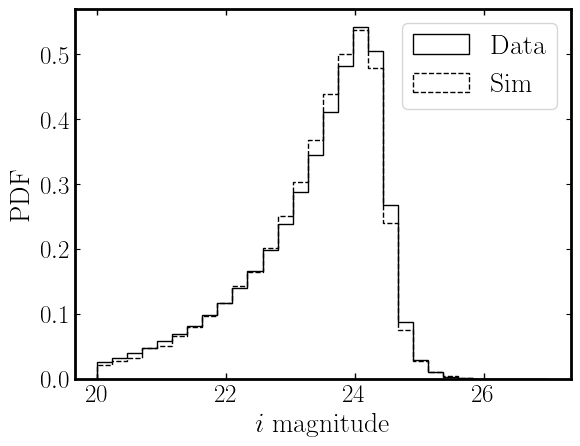

In [7]:
plt.close()
plt.hist(mag_i, bins=30, range=(20, 27), histtype="step", density =True, color="black", label="Data")
plt.hist(mag_i_sim, bins=30, range=(20, 27), histtype="step", density=True, color="black", linestyle="--", label="Sim")
plt.legend()
plt.xlabel(r"$i$ magnitude")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

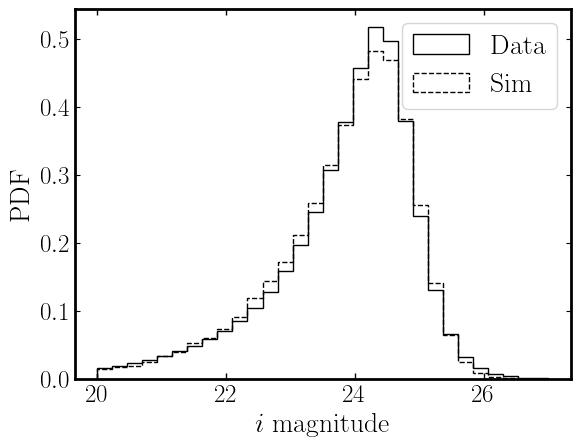

In [8]:
plt.close()
plt.hist(mag_r, bins=30, range=(20, 27), histtype="step", density =True, color="black", label="Data")
plt.hist(mag_r_sim, bins=30, range=(20, 27), histtype="step", density=True, color="black", linestyle="--", label="Sim")
plt.legend()
plt.xlabel(r"$i$ magnitude")
plt.ylabel("PDF")

In [9]:
class corner_plot:
    def __init__(self, xrange, yrange, bins=30, xlabel="x", ylabel="y", xlim=None, ylim=None):
        fig = plt.figure(figsize=(8, 8))
        gs = fig.add_gridspec(4, 4, wspace=0.05, hspace=0.05)
        # 2D Contour plot (central plot)
        self.ax_2d = fig.add_subplot(gs[1:4, 0:3])
        self.ax_2d.set_xlabel(xlabel)
        self.ax_2d.set_ylabel(ylabel)
        
        self.ax_top = fig.add_subplot(gs[0, 0:3], sharex=self.ax_2d)
        self.ax_top.set_ylabel('PDF')
        self.ax_top.tick_params(axis="x", labelbottom=False)
        
        self.ax_right = fig.add_subplot(gs[1:4, 3], sharey=self.ax_2d)
        self.ax_right.set_xlabel('PDF')
        self.ax_right.tick_params(axis="y", labelleft=False)
        
        self.range_2d = [xrange, yrange]
        self.range_x = xrange
        self.range_y = yrange
        self.bins = bins

        if xlim is None:
            xlim = self.range_x
            
        if ylim is None:
            ylim = self.range_y
        self.ax_2d.set_xlim(xlim)
        self.ax_2d.set_ylim(ylim)
        self.ax_top.set_xlim(xlim)
        self.ax_right.set_ylim(ylim)
        return

    def make_plot(self, x_array, y_array, linestyles="-", levels=[0.1, 0.3, 0.6]):
        # Create figure and gridspec
        hist, xedges, yedges = np.histogram2d(
            x=x_array, y=y_array, bins=self.bins,
            range=self.range_2d,
            density=True,
        )
        # Calculate the midpoints of bins
        xcenters = 0.5 * (xedges[:-1] + xedges[1:])
        ycenters = 0.5 * (yedges[:-1] + yedges[1:])
        X, Y = np.meshgrid(xcenters, ycenters)
        
        # Contour plot
        contour = self.ax_2d.contour(
            X, Y, hist.T, levels=levels, 
            colors="black", linestyles=linestyles,
        )
        
        # 1D Histogram (top plot)
        self.ax_top.hist(x_array, bins=self.bins, histtype='step', color='black', 
            range=self.range_x, density=True, ls=linestyles,
        )
        
        # 1D Histogram (right plot)
        self.ax_right.hist(y_array, bins=self.bins, histtype='step', color='black', 
            range=self.range_y, density=True, 
            ls=linestyles, orientation='horizontal', 
        )
        
        # Final adjustments
        plt.tight_layout()

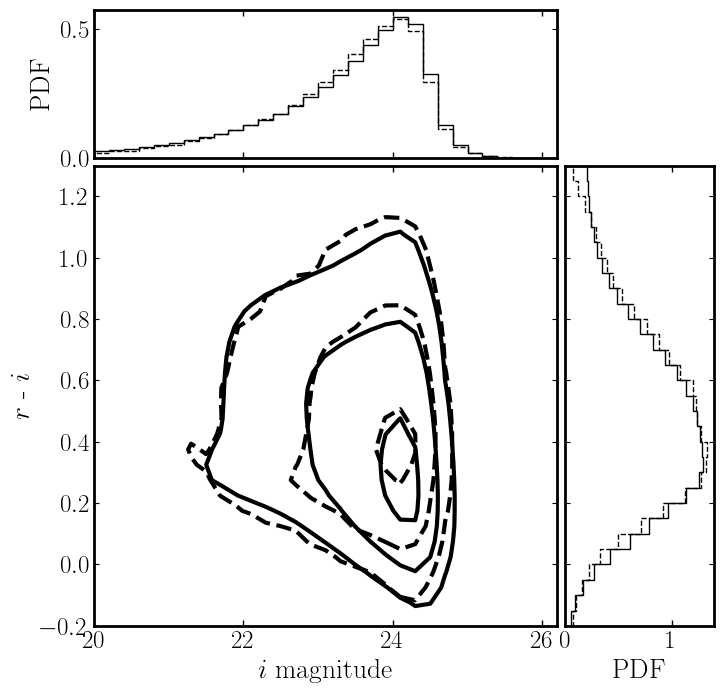

In [10]:
plt.close()
xrange = [20.0, 26.0]
yrange = [-0.2, 1.3]
xlabel = r'$i$ magnitude'
ylabel = r'$r$ - $i$'

corp = corner_plot(
    xrange=xrange, yrange=yrange, bins=30, xlabel=xlabel, ylabel=ylabel,
    xlim=[20, 26.2], ylim=[-0.2, 1.3]
)

x_array = mag_i_sim
y_array = mag_r_sim - mag_i_sim

x_array_d = mag_i
y_array_d = mag_r - mag_i

corp.make_plot(x_array=x_array_d, y_array=y_array_d, linestyles="-",  levels=[0.1, 0.3, 0.65])
corp.make_plot(x_array=x_array, y_array=y_array, linestyles="--",  levels=[0.1, 0.3, 0.65])

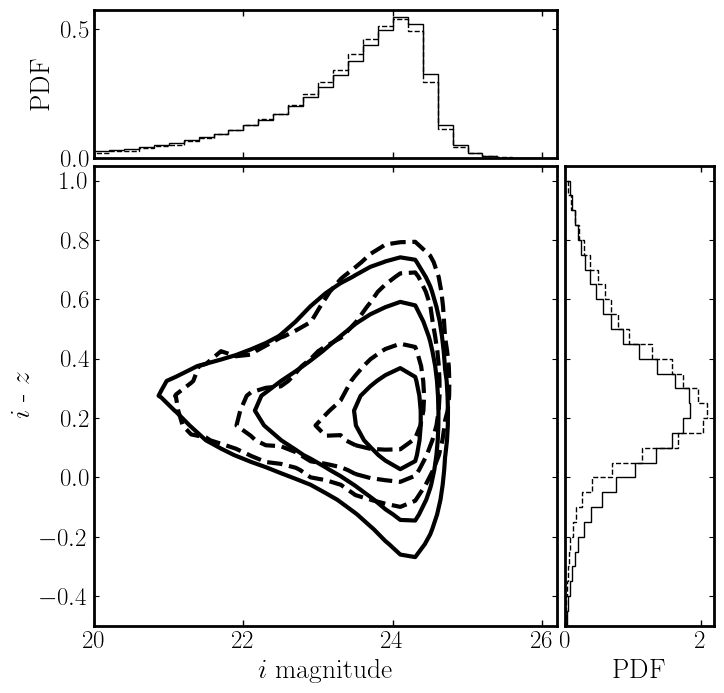

In [11]:
plt.close()

xrange = [20.0, 26.0]
yrange = [-0.5, 1.0]
xlabel = r'$i$ magnitude'
ylabel = r'$i$ - $z$'

corp = corner_plot(
    xrange=xrange, yrange=yrange, bins=30, xlabel=xlabel, ylabel=ylabel,
    xlim=[20, 26.2], ylim=[-0.5, 1.05]
)

x_array = mag_i_sim
y_array = mag_i_sim - mag_z_sim

x_array_d = mag_i
y_array_d = mag_i - mag_z

corp.make_plot(x_array=x_array_d, y_array=y_array_d, linestyles="-", levels=[0.15, 0.3, 0.65])
corp.make_plot(x_array=x_array, y_array=y_array, linestyles="--", levels=[0.15, 0.3, 0.65])

In [13]:
r1 = (
    data_sim["fpfs_de1_dg1"] * data_sim["wsel"] +
    data_sim["dwsel_dg1"] * data_sim["fpfs_e1"]
)
r2 = (
    data_sim["fpfs_de2_dg2"] * data_sim["wsel"] +
    data_sim["dwsel_dg2"] * data_sim["fpfs_e2"]
)
res_sim = (r1 + r2) / 2.0
r1 = (
    data_obs["de1_dg1"] * data_obs["wsel"] +
    data_obs["dwsel_dg1"] * data_obs["e1"]
)
r2 = (
    data_obs["de2_dg2"] * data_obs["wsel"] +
    data_obs["dwsel_dg2"] * data_obs["e2"]
)
res_obs = (r1 + r2) / 2.0

In [23]:
np.sum(np.isnan(data_obs["i_variance_value"]))

0

(array([4.7765167e+07, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([1.33098173e-03, 3.31433983e+01, 6.62854614e+01, 9.94275284e+01,
        1.32569595e+02, 1.65711670e+02, 1.98853729e+02, 2.31995804e+02,
        2.65137878e+02, 2.98279938e+02, 3.31421997e+02]),
 <BarContainer object of 10 artists>)

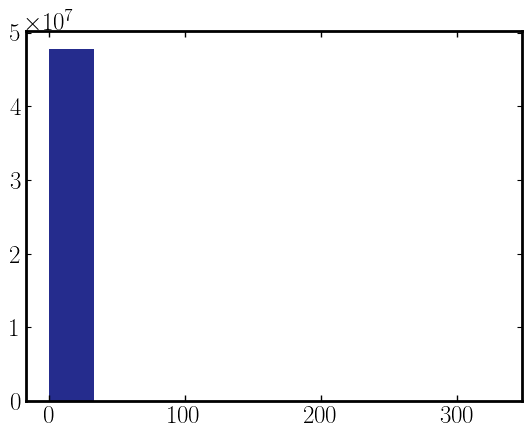

In [27]:
plt.hist(data_obs["i_variance_value"])

In [28]:
np.min(data_obs["i_variance_value"])

0.0013309817

In [29]:
np.max(data_obs["i_variance_value"])

331.422

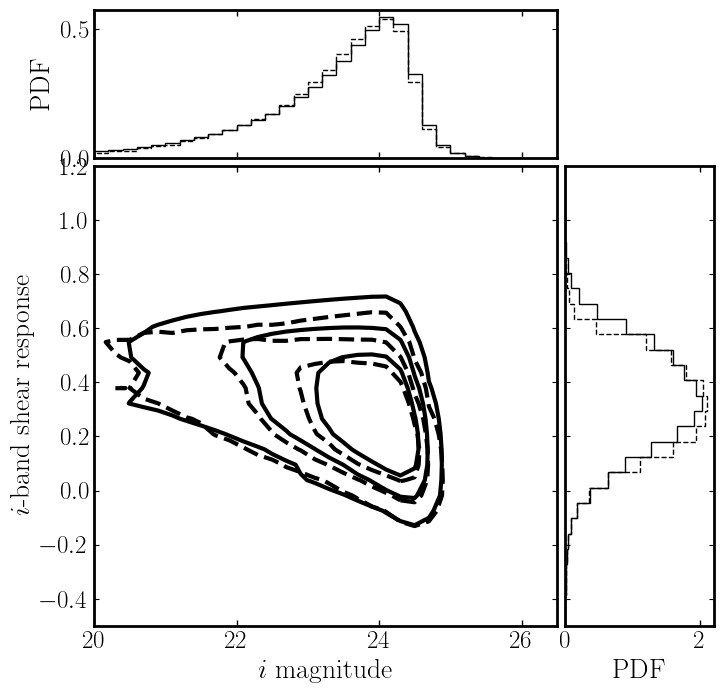

In [18]:
plt.close()

xrange = [20., 26]
yrange = [-0.5, 1.2]
xlabel = r'$i$ magnitude'
ylabel = r'$i$-band shear response'
corp = corner_plot(
    xrange=xrange, yrange=yrange, bins=30, xlabel=xlabel, ylabel=ylabel,
    xlim=[20., 26.5], ylim=[-0.5, 1.2]
)

x_array = mag_i_sim
y_array = res_sim

x_array_d = mag_i
y_array_d = res_obs

corp.make_plot(x_array=x_array_d, y_array=y_array_d, linestyles="-")
corp.make_plot(x_array=x_array, y_array=y_array, linestyles="--")

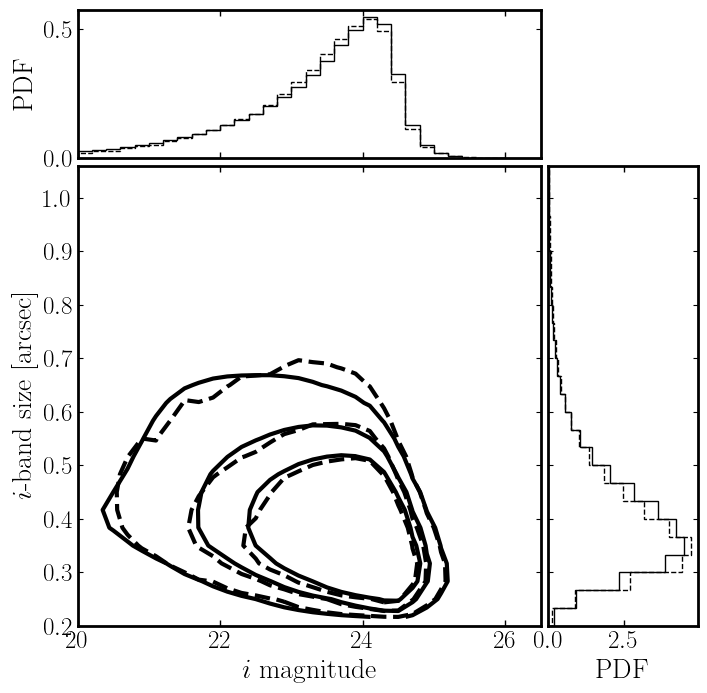

In [15]:
plt.close()

xrange = [20., 26]
yrange = [0.2, 1.2]
xlabel = r'$i$ magnitude'
ylabel = r'$i$-band size [arcsec]'
corp = corner_plot(
    xrange=xrange, yrange=yrange, bins=30, xlabel=xlabel, ylabel=ylabel,
    xlim=[20., 26.5], ylim=[0.2, 1.06]
)

x_array = mag_i_sim
y_array = size_sim

x_array_d = mag_i
y_array_d = size

corp.make_plot(x_array=x_array_d, y_array=y_array_d, linestyles="-")
corp.make_plot(x_array=x_array, y_array=y_array, linestyles="--")

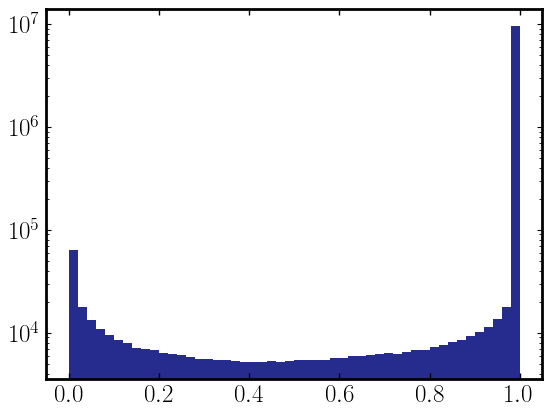

In [16]:
plt.hist(data_sim["wsel"], bins=50)
plt.yscale("log")

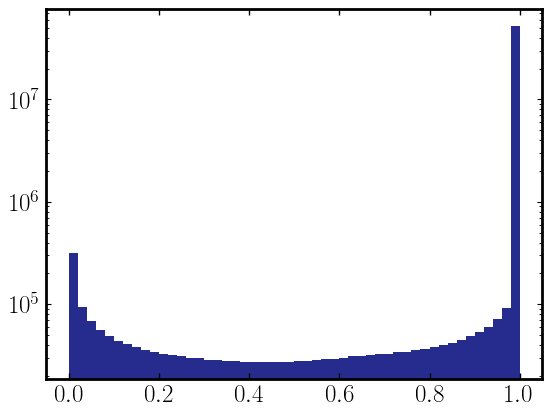

In [17]:
plt.hist(data_obs["wsel"], bins=50)
plt.yscale("log")

(array([0.73484403, 2.09073111, 3.18998667, 4.02071663, 4.62672569,
        5.07221102, 5.38439956, 5.59603082, 5.7295772 , 5.7960176 ,
        5.7972255 , 5.7650807 , 5.69083211, 5.58029429, 5.45057497,
        5.30512527, 5.13986856, 4.97060916, 4.79881687, 4.61422151,
        4.43205119, 4.25305159, 4.0700647 , 3.90139692, 3.72307522,
        3.54929853, 3.38140725, 3.22049218, 3.07043585, 2.91405963,
        2.76824634, 2.63208696, 2.4984389 , 2.36791534, 2.25087584,
        2.131741  , 2.02333549, 1.91487758, 1.80987081, 1.717322  ,
        1.62248682, 1.53374657, 1.44696608, 1.36724807, 1.2938746 ,
        1.22064595, 1.14683184, 1.08029283, 1.01518358, 0.96014423]),
 array([8.43303837e-06, 6.00826433e-03, 1.20080956e-02, 1.80079269e-02,
        2.40077582e-02, 3.00075895e-02, 3.60074208e-02, 4.20072521e-02,
        4.80070834e-02, 5.40069146e-02, 6.00067459e-02, 6.60065772e-02,
        7.20064085e-02, 7.80062398e-02, 8.40060711e-02, 9.00059024e-02,
        9.60057337e-02, 1.0200

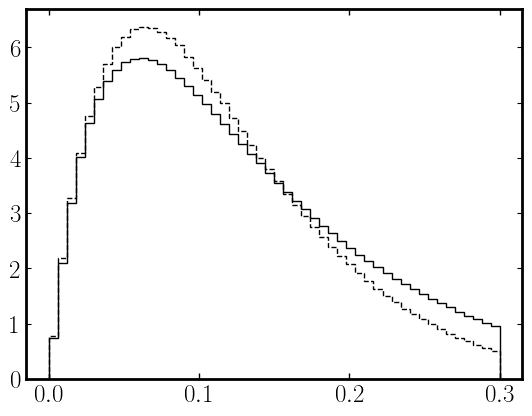

In [62]:
abse_sim = np.sqrt(data_sim["fpfs_e1"]**2 + data_sim["fpfs_e2"]**2)
abse = np.sqrt(data_all["e1"]**2 + data_all["e2"]**2)
plt.hist(abse_sim, bins=50, histtype="step", density=True, color="black", linestyle="--", label="Sim")
plt.hist(abse, bins=50, histtype="step", density=True, color="black", linestyle="-", label="Data")